In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Reader
import pandas_datareader as pdr

# Date and Time Utilities
from datetime import datetime

# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Deep Learning - Keras/TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError, MeanAbsolutePercentageError, RootMeanSquaredError
from tensorflow.keras import backend as K

# Set up the visualization style
plt.style.use('seaborn-whitegrid')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# This line ensures that the plot is displayed inside the Jupyter Notebook
%matplotlib inline

# Set the display.max_colwidth option to None to display the full contents of columns
pd.set_option('display.max_colwidth', None)

                GDP
DATE               
1950-01-01  280.828
1950-04-01  290.383
1950-07-01  308.153
1950-10-01  319.945
1951-01-01  336.000
                  GDP
DATE                 
2022-07-01  25994.639
2022-10-01  26408.405
2023-01-01  26813.601
2023-04-01  27063.012
2023-07-01  27623.543


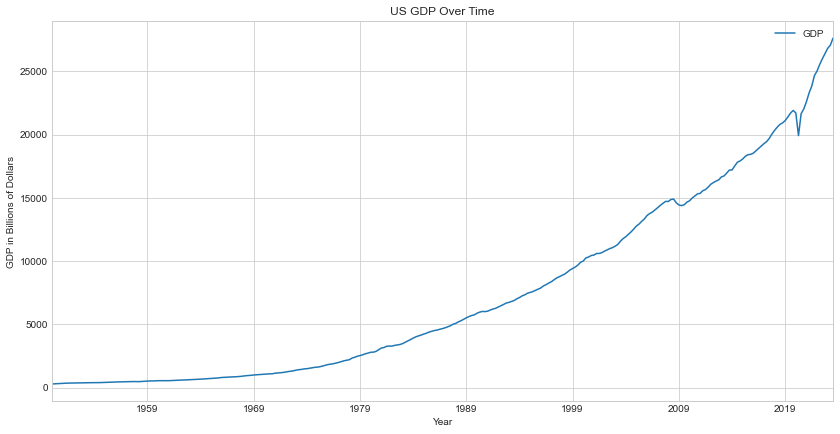

In [2]:
# Set the start and end date
start_date = datetime(1950, 1, 1)
end_date = datetime.now()

# Fetch the GDP data
gdp_data = pdr.get_data_fred('GDP', start_date, end_date)

# Display the first few rows of the data
print(gdp_data.head())
print(gdp_data.tail())

# Plot the data
gdp_data.plot(figsize=(14, 7), title='US GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP in Billions of Dollars')
plt.show()

In [3]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
gdp_scaled = scaler.fit_transform(gdp_data)

In [4]:
# Function to create sequences
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:(i + sequence_length)]
        y = data[i + sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Define the sequence length (number of time steps)
sequence_length = 4 

In [5]:
# Create sequences
X, y = create_sequences(gdp_scaled, sequence_length)

In [6]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [7]:
def create_rnn_model(sequence_length):
    model = Sequential()
    model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(SimpleRNN(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', 
                  loss='mean_squared_error', 
                  metrics=[MeanSquaredError(), MeanAbsoluteError(), MeanAbsolutePercentageError(), RootMeanSquaredError()])
    return model

def create_lstm_model(sequence_length):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', 
                  loss='mean_squared_error', 
                  metrics=[MeanSquaredError(), MeanAbsoluteError(), MeanAbsolutePercentageError(), RootMeanSquaredError()])
    return model

def create_gru_model(sequence_length):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(GRU(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error', 
                  metrics=[MeanSquaredError(), MeanAbsoluteError(), MeanAbsolutePercentageError(), RootMeanSquaredError()])
    return model

In [8]:
# Create and train the basic RNN model
rnn_model = create_rnn_model(sequence_length)
rnn_history = rnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Create and train the LSTM model
lstm_model = create_lstm_model(sequence_length)
lstm_history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Create and train the GRU model
gru_model = create_gru_model(sequence_length)
gru_history = gru_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
8/8 [==============================] - 3s 85ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 153.4299 - root_mean_squared_error: 0.0827 - val_loss: 0.0750 - val_mean_squared_error: 0.0750 - val_mean_absolute_error: 0.2573 - val_mean_absolute_percentage_error: 35.7204 - val_root_mean_squared_error: 0.2739
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 76.3477 - root_mean_squared_error: 0.0394 - val_loss: 0.0086 - val_mean_squared_error: 0.0086 - val_mean_absolute_error: 0.0640 - val_mean_absolute_percentage_error: 7.9764 - val_root_mean_squared_error: 0.0925
Epoch 3/100
8/8 [==============================] - 0s 12ms/step - loss: 7.2505e-04 - mean_squared_error: 7.2505e-04 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 78.9119 - root_mean_squared_error: 0.0269 - val_loss

Epoch 22/100
8/8 [==============================] - 0s 18ms/step - loss: 2.0063e-05 - mean_squared_error: 2.0063e-05 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 4.0008 - root_mean_squared_error: 0.0045 - val_loss: 0.0041 - val_mean_squared_error: 0.0041 - val_mean_absolute_error: 0.0460 - val_mean_absolute_percentage_error: 5.8083 - val_root_mean_squared_error: 0.0639
Epoch 23/100
8/8 [==============================] - 0s 17ms/step - loss: 1.9529e-05 - mean_squared_error: 1.9529e-05 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 7.5575 - root_mean_squared_error: 0.0044 - val_loss: 0.0039 - val_mean_squared_error: 0.0039 - val_mean_absolute_error: 0.0448 - val_mean_absolute_percentage_error: 5.6582 - val_root_mean_squared_error: 0.0623
Epoch 24/100
8/8 [==============================] - 0s 11ms/step - loss: 1.6376e-05 - mean_squared_error: 1.6376e-05 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 3.5072 - root_mean_squared_error: 0.0

Epoch 43/100
8/8 [==============================] - 0s 20ms/step - loss: 1.4545e-05 - mean_squared_error: 1.4545e-05 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 8.6293 - root_mean_squared_error: 0.0038 - val_loss: 0.0017 - val_mean_squared_error: 0.0017 - val_mean_absolute_error: 0.0261 - val_mean_absolute_percentage_error: 3.2733 - val_root_mean_squared_error: 0.0407
Epoch 44/100
8/8 [==============================] - 0s 21ms/step - loss: 2.0336e-05 - mean_squared_error: 2.0336e-05 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 6.3463 - root_mean_squared_error: 0.0045 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - val_mean_absolute_error: 0.0250 - val_mean_absolute_percentage_error: 3.1974 - val_root_mean_squared_error: 0.0385
Epoch 45/100
8/8 [==============================] - 0s 17ms/step - loss: 2.5115e-05 - mean_squared_error: 2.5115e-05 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 6.6473 - root_mean_squared_error: 0.0

Epoch 64/100
8/8 [==============================] - 0s 14ms/step - loss: 1.8485e-05 - mean_squared_error: 1.8485e-05 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 5.8529 - root_mean_squared_error: 0.0043 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0235 - val_mean_absolute_percentage_error: 2.9728 - val_root_mean_squared_error: 0.0367
Epoch 65/100
8/8 [==============================] - 0s 15ms/step - loss: 1.5602e-05 - mean_squared_error: 1.5602e-05 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 6.2445 - root_mean_squared_error: 0.0039 - val_loss: 0.0019 - val_mean_squared_error: 0.0019 - val_mean_absolute_error: 0.0309 - val_mean_absolute_percentage_error: 3.9108 - val_root_mean_squared_error: 0.0437
Epoch 66/100
8/8 [==============================] - 0s 12ms/step - loss: 9.2558e-06 - mean_squared_error: 9.2558e-06 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 4.6649 - root_mean_squared_error: 0.0

Epoch 85/100
8/8 [==============================] - 0s 19ms/step - loss: 3.3164e-05 - mean_squared_error: 3.3164e-05 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 6.3783 - root_mean_squared_error: 0.0058 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0215 - val_mean_absolute_percentage_error: 2.7570 - val_root_mean_squared_error: 0.0333
Epoch 86/100
8/8 [==============================] - 0s 20ms/step - loss: 1.4656e-05 - mean_squared_error: 1.4656e-05 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 4.9344 - root_mean_squared_error: 0.0038 - val_loss: 0.0019 - val_mean_squared_error: 0.0019 - val_mean_absolute_error: 0.0324 - val_mean_absolute_percentage_error: 4.1337 - val_root_mean_squared_error: 0.0439
Epoch 87/100
8/8 [==============================] - 0s 16ms/step - loss: 1.1387e-05 - mean_squared_error: 1.1387e-05 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 4.2149 - root_mean_squared_error: 0.0

8/8 [==============================] - 0s 11ms/step - loss: 2.1340e-04 - mean_squared_error: 2.1340e-04 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 63.4694 - root_mean_squared_error: 0.0146 - val_loss: 0.0216 - val_mean_squared_error: 0.0216 - val_mean_absolute_error: 0.1371 - val_mean_absolute_percentage_error: 19.0803 - val_root_mean_squared_error: 0.1471
Epoch 7/100
8/8 [==============================] - 0s 18ms/step - loss: 3.7497e-04 - mean_squared_error: 3.7497e-04 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 49.3972 - root_mean_squared_error: 0.0194 - val_loss: 0.0137 - val_mean_squared_error: 0.0137 - val_mean_absolute_error: 0.1064 - val_mean_absolute_percentage_error: 14.6612 - val_root_mean_squared_error: 0.1171
Epoch 8/100
8/8 [==============================] - 0s 11ms/step - loss: 2.4607e-04 - mean_squared_error: 2.4607e-04 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 47.0948 - root_mean_squared_error: 0.0157 - val_

Epoch 27/100
8/8 [==============================] - 0s 11ms/step - loss: 2.8553e-05 - mean_squared_error: 2.8553e-05 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 19.7566 - root_mean_squared_error: 0.0053 - val_loss: 5.0017e-04 - val_mean_squared_error: 5.0017e-04 - val_mean_absolute_error: 0.0170 - val_mean_absolute_percentage_error: 2.5191 - val_root_mean_squared_error: 0.0224
Epoch 28/100
8/8 [==============================] - 0s 13ms/step - loss: 2.5016e-05 - mean_squared_error: 2.5016e-05 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 24.3347 - root_mean_squared_error: 0.0050 - val_loss: 4.9378e-04 - val_mean_squared_error: 4.9378e-04 - val_mean_absolute_error: 0.0168 - val_mean_absolute_percentage_error: 2.4910 - val_root_mean_squared_error: 0.0222
Epoch 29/100
8/8 [==============================] - 0s 13ms/step - loss: 2.0928e-05 - mean_squared_error: 2.0928e-05 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 13.5047 - root_mean

8/8 [==============================] - 0s 10ms/step - loss: 1.0315e-05 - mean_squared_error: 1.0315e-05 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 7.5082 - root_mean_squared_error: 0.0032 - val_loss: 7.5005e-04 - val_mean_squared_error: 7.5005e-04 - val_mean_absolute_error: 0.0174 - val_mean_absolute_percentage_error: 2.2148 - val_root_mean_squared_error: 0.0274
Epoch 48/100
8/8 [==============================] - 0s 11ms/step - loss: 9.7747e-06 - mean_squared_error: 9.7747e-06 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 6.8975 - root_mean_squared_error: 0.0031 - val_loss: 8.2028e-04 - val_mean_squared_error: 8.2028e-04 - val_mean_absolute_error: 0.0185 - val_mean_absolute_percentage_error: 2.3573 - val_root_mean_squared_error: 0.0286
Epoch 49/100
8/8 [==============================] - 0s 11ms/step - loss: 1.6278e-05 - mean_squared_error: 1.6278e-05 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 8.1550 - root_mean_squared_error: 

Epoch 68/100
8/8 [==============================] - 0s 18ms/step - loss: 9.7081e-06 - mean_squared_error: 9.7081e-06 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 4.7724 - root_mean_squared_error: 0.0031 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0223 - val_mean_absolute_percentage_error: 2.8246 - val_root_mean_squared_error: 0.0329
Epoch 69/100
8/8 [==============================] - 0s 18ms/step - loss: 9.5471e-06 - mean_squared_error: 9.5471e-06 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 4.1210 - root_mean_squared_error: 0.0031 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0238 - val_mean_absolute_percentage_error: 3.0291 - val_root_mean_squared_error: 0.0341
Epoch 70/100
8/8 [==============================] - 0s 13ms/step - loss: 9.5814e-06 - mean_squared_error: 9.5814e-06 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.5187 - root_mean_squared_error: 0.0

Epoch 89/100
8/8 [==============================] - 0s 13ms/step - loss: 1.0612e-05 - mean_squared_error: 1.0612e-05 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 4.8577 - root_mean_squared_error: 0.0033 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0207 - val_mean_absolute_percentage_error: 2.6126 - val_root_mean_squared_error: 0.0317
Epoch 90/100
8/8 [==============================] - 0s 16ms/step - loss: 9.6949e-06 - mean_squared_error: 9.6949e-06 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 3.5108 - root_mean_squared_error: 0.0031 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0226 - val_mean_absolute_percentage_error: 2.8583 - val_root_mean_squared_error: 0.0333
Epoch 91/100
8/8 [==============================] - 0s 12ms/step - loss: 9.4946e-06 - mean_squared_error: 9.4946e-06 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 5.2292 - root_mean_squared_error: 0.0

Epoch 10/100
8/8 [==============================] - 0s 15ms/step - loss: 1.4298e-05 - mean_squared_error: 1.4298e-05 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 8.5494 - root_mean_squared_error: 0.0038 - val_loss: 3.1208e-04 - val_mean_squared_error: 3.1208e-04 - val_mean_absolute_error: 0.0116 - val_mean_absolute_percentage_error: 1.6865 - val_root_mean_squared_error: 0.0177
Epoch 11/100
8/8 [==============================] - 0s 18ms/step - loss: 1.0063e-05 - mean_squared_error: 1.0063e-05 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 6.6805 - root_mean_squared_error: 0.0032 - val_loss: 3.0530e-04 - val_mean_squared_error: 3.0530e-04 - val_mean_absolute_error: 0.0109 - val_mean_absolute_percentage_error: 1.5362 - val_root_mean_squared_error: 0.0175
Epoch 12/100
8/8 [==============================] - 0s 19ms/step - loss: 9.6096e-06 - mean_squared_error: 9.6096e-06 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 12.8249 - root_mean_s

8/8 [==============================] - 0s 19ms/step - loss: 8.7292e-06 - mean_squared_error: 8.7292e-06 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 5.0302 - root_mean_squared_error: 0.0030 - val_loss: 3.2712e-04 - val_mean_squared_error: 3.2712e-04 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.4670 - val_root_mean_squared_error: 0.0181
Epoch 31/100
8/8 [==============================] - 0s 16ms/step - loss: 8.4618e-06 - mean_squared_error: 8.4618e-06 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 8.7749 - root_mean_squared_error: 0.0029 - val_loss: 3.3760e-04 - val_mean_squared_error: 3.3760e-04 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.4357 - val_root_mean_squared_error: 0.0184
Epoch 32/100
8/8 [==============================] - 0s 9ms/step - loss: 7.7044e-06 - mean_squared_error: 7.7044e-06 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 7.5407 - root_mean_squared_error: 0

Epoch 51/100
8/8 [==============================] - 0s 16ms/step - loss: 7.8263e-06 - mean_squared_error: 7.8263e-06 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 5.6026 - root_mean_squared_error: 0.0028 - val_loss: 3.6825e-04 - val_mean_squared_error: 3.6825e-04 - val_mean_absolute_error: 0.0114 - val_mean_absolute_percentage_error: 1.5123 - val_root_mean_squared_error: 0.0192
Epoch 52/100
8/8 [==============================] - 0s 11ms/step - loss: 7.2887e-06 - mean_squared_error: 7.2887e-06 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 5.6509 - root_mean_squared_error: 0.0027 - val_loss: 3.6585e-04 - val_mean_squared_error: 3.6585e-04 - val_mean_absolute_error: 0.0115 - val_mean_absolute_percentage_error: 1.5361 - val_root_mean_squared_error: 0.0191
Epoch 53/100
8/8 [==============================] - 0s 20ms/step - loss: 7.7473e-06 - mean_squared_error: 7.7473e-06 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 4.1953 - root_mean_sq

8/8 [==============================] - 0s 10ms/step - loss: 1.0284e-05 - mean_squared_error: 1.0284e-05 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 8.9601 - root_mean_squared_error: 0.0032 - val_loss: 4.0198e-04 - val_mean_squared_error: 4.0198e-04 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 1.6008 - val_root_mean_squared_error: 0.0200
Epoch 72/100
8/8 [==============================] - 0s 9ms/step - loss: 8.1262e-06 - mean_squared_error: 8.1262e-06 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 7.6223 - root_mean_squared_error: 0.0029 - val_loss: 5.3018e-04 - val_mean_squared_error: 5.3018e-04 - val_mean_absolute_error: 0.0154 - val_mean_absolute_percentage_error: 1.9859 - val_root_mean_squared_error: 0.0230
Epoch 73/100
8/8 [==============================] - 0s 9ms/step - loss: 8.4386e-06 - mean_squared_error: 8.4386e-06 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 5.5817 - root_mean_squared_error: 0.

Epoch 92/100
8/8 [==============================] - 0s 12ms/step - loss: 7.2173e-06 - mean_squared_error: 7.2173e-06 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 3.6917 - root_mean_squared_error: 0.0027 - val_loss: 4.2071e-04 - val_mean_squared_error: 4.2071e-04 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 1.6719 - val_root_mean_squared_error: 0.0205
Epoch 93/100
8/8 [==============================] - 0s 16ms/step - loss: 6.8981e-06 - mean_squared_error: 6.8981e-06 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 3.2724 - root_mean_squared_error: 0.0026 - val_loss: 5.2126e-04 - val_mean_squared_error: 5.2126e-04 - val_mean_absolute_error: 0.0148 - val_mean_absolute_percentage_error: 1.9018 - val_root_mean_squared_error: 0.0228
Epoch 94/100
8/8 [==============================] - 0s 10ms/step - loss: 7.5514e-06 - mean_squared_error: 7.5514e-06 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 6.1117 - root_mean_sq

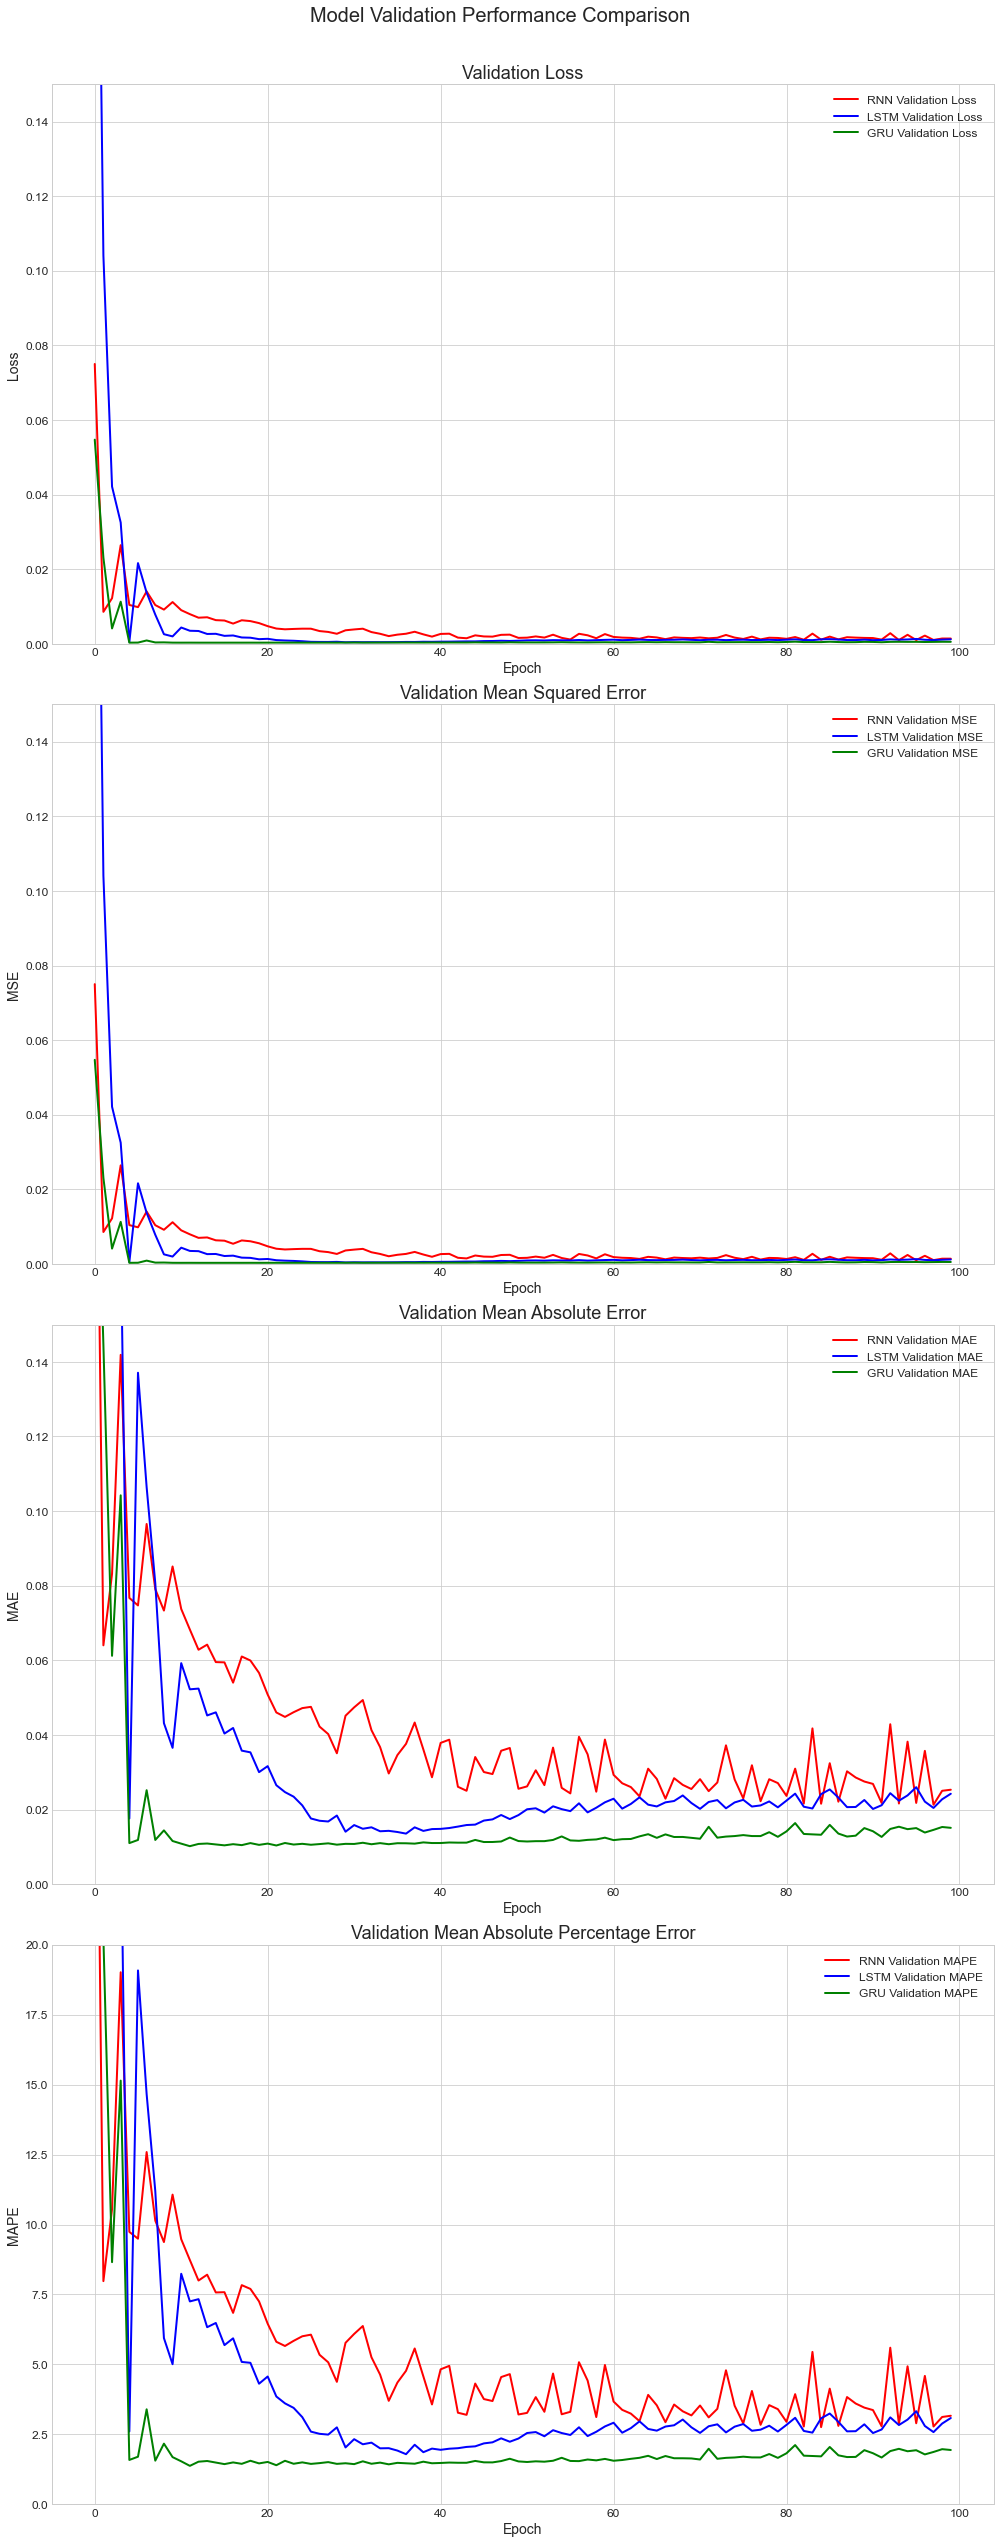

In [9]:
# Set up the matplotlib figure
fig, axes = plt.subplots(4, 1, figsize=(14, 36))  # Adjusted for 4 subplots
fig.suptitle('Model Validation Performance Comparison', fontsize=20)

# Validation Loss
axes[0].plot(rnn_history.history['val_loss'], label='RNN Validation Loss', color='red', linewidth=2)
axes[0].plot(lstm_history.history['val_loss'], label='LSTM Validation Loss', color='blue', linewidth=2)
axes[0].plot(gru_history.history['val_loss'], label='GRU Validation Loss', color='green', linewidth=2)
axes[0].set_title('Validation Loss', fontsize=18)
axes[0].set_xlabel('Epoch', fontsize=14)
axes[0].set_ylabel('Loss', fontsize=14)
axes[0].set_ylim(0, 0.15)  # Set y-axis limits
axes[0].legend(fontsize=12)
axes[0].tick_params(axis='both', which='major', labelsize=12)

# Validation Mean Squared Error
axes[1].plot(rnn_history.history['val_mean_squared_error'], label='RNN Validation MSE', color='red', linewidth=2)
axes[1].plot(lstm_history.history['val_mean_squared_error'], label='LSTM Validation MSE', color='blue', linewidth=2)
axes[1].plot(gru_history.history['val_mean_squared_error'], label='GRU Validation MSE', color='green', linewidth=2)
axes[1].set_title('Validation Mean Squared Error', fontsize=18)
axes[1].set_xlabel('Epoch', fontsize=14)
axes[1].set_ylabel('MSE', fontsize=14)
axes[1].set_ylim(0, 0.15)  # Set y-axis limits
axes[1].legend(fontsize=12)
axes[1].tick_params(axis='both', which='major', labelsize=12)

# Validation Mean Absolute Error
axes[2].plot(rnn_history.history['val_mean_absolute_error'], label='RNN Validation MAE', color='red', linewidth=2)
axes[2].plot(lstm_history.history['val_mean_absolute_error'], label='LSTM Validation MAE', color='blue', linewidth=2)
axes[2].plot(gru_history.history['val_mean_absolute_error'], label='GRU Validation MAE', color='green', linewidth=2)
axes[2].set_title('Validation Mean Absolute Error', fontsize=18)
axes[2].set_xlabel('Epoch', fontsize=14)
axes[2].set_ylabel('MAE', fontsize=14)
axes[2].set_ylim(0, 0.15)  # Set y-axis limits
axes[2].legend(fontsize=12)
axes[2].tick_params(axis='both', which='major', labelsize=12)

# Validation Mean Absolute Percentage Error
axes[3].plot(rnn_history.history['val_mean_absolute_percentage_error'], label='RNN Validation MAPE', color='red', linewidth=2)
axes[3].plot(lstm_history.history['val_mean_absolute_percentage_error'], label='LSTM Validation MAPE', color='blue', linewidth=2)
axes[3].plot(gru_history.history['val_mean_absolute_percentage_error'], label='GRU Validation MAPE', color='green', linewidth=2)
axes[3].set_title('Validation Mean Absolute Percentage Error', fontsize=18)
axes[3].set_xlabel('Epoch', fontsize=14)
axes[3].set_ylabel('MAPE', fontsize=14)
axes[3].set_ylim(0, 20)  # Set y-axis limits for MAPE
axes[3].legend(fontsize=12)
axes[3].tick_params(axis='both', which='major', labelsize=12)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [10]:
# Make predictions
rnn_predictions = rnn_model.predict(X_test)
lstm_predictions = lstm_model.predict(X_test)
gru_predictions = gru_model.predict(X_test)

2/2 [==============================] - 1s 8ms/step


In [11]:
# Function to inverse transform the predictions
def inverse_transform(scaler, data):
    return scaler.inverse_transform(data)

In [12]:
# Inverse transform predictions and actual values
rnn_predictions = inverse_transform(scaler, rnn_predictions)
lstm_predictions = inverse_transform(scaler, lstm_predictions)
gru_predictions = inverse_transform(scaler, gru_predictions)
y_test_actual = inverse_transform(scaler, y_test)

In [13]:
# Evaluate performance
def evaluate_performance(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    return mse, mae

rnn_mse, rnn_mae = evaluate_performance(y_test_actual, rnn_predictions)
lstm_mse, lstm_mae = evaluate_performance(y_test_actual, lstm_predictions)
gru_mse, gru_mae = evaluate_performance(y_test_actual, gru_predictions)

# Print performance metrics
print("RNN - MSE: {:.4f}, MAE: {:.4f}".format(rnn_mse, rnn_mae))
print("LSTM - MSE: {:.4f}, MAE: {:.4f}".format(lstm_mse, lstm_mae))
print("GRU - MSE: {:.4f}, MAE: {:.4f}".format(gru_mse, gru_mae))

RNN - MSE: 1053539.4574, MAE: 691.9171
LSTM - MSE: 897793.4230, MAE: 662.4098
GRU - MSE: 397374.2223, MAE: 412.6018


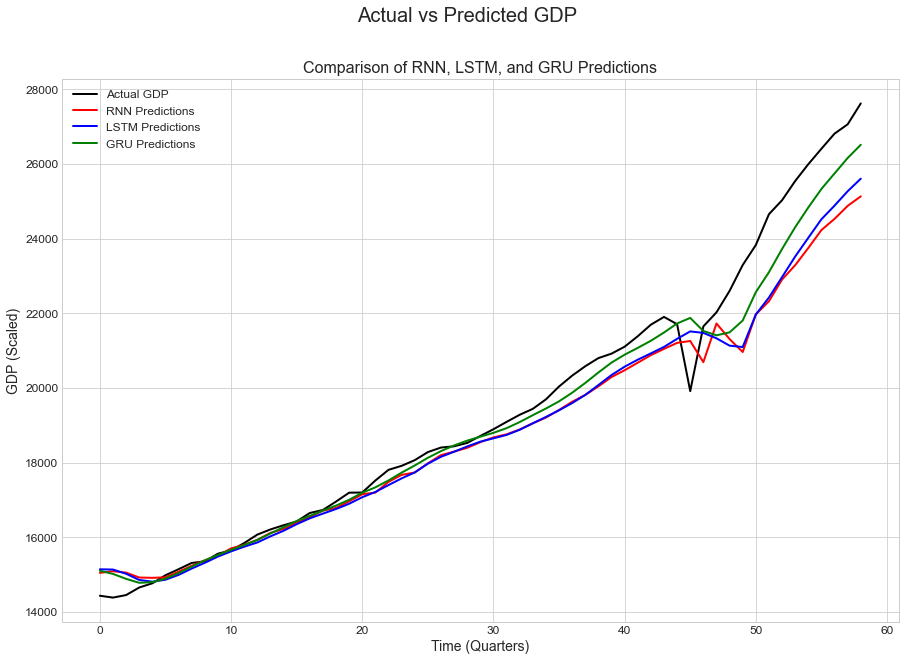

In [14]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 10))  # Single plot
fig.suptitle('Actual vs Predicted GDP', fontsize=20)

# Plot the actual data points
ax.plot(y_test_actual, label='Actual GDP', color='black', linewidth=2)

# Plot the predictions
ax.plot(rnn_predictions, label='RNN Predictions', color='red', linewidth=2)
ax.plot(lstm_predictions, label='LSTM Predictions', color='blue', linewidth=2)
ax.plot(gru_predictions, label='GRU Predictions', color='green', linewidth=2)

# Setting labels, title, and their font sizes
ax.set_xlabel('Time (Quarters)', fontsize=14)
ax.set_ylabel('GDP (Scaled)', fontsize=14)
ax.set_title('Comparison of RNN, LSTM, and GRU Predictions', fontsize=16)

# Set the legend with increased font size
ax.legend(fontsize=12)

# Increase the font size of tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Display the plot
plt.show()